# DESAFIO 1 - LIMPEZA E TRATAMENTO DE DADOS

## Sumario

- [DESAFIO](#o-desafio)
- [BIBLIOTECAS](#importando-as-bibliotecas)
- [DATASETS](#importando-as-bases)
- [DADOS-DAS-COLUNA](#verificando-dos-tipos-de-dados-das-colunas)
- [MODIFICANDO-OS-TIPOS-DE-DADOS](#modificando-dos-tipos-dos-dados)
- [COMPARACAO-FINAL](#dataframe-processado-em-comparacao-com-o-dataframe-final)
- [SALVANDO-O-DATAFRAME](#salvando-o-dataframe-em-um-arquivo-csv)

## O DESAFIO

Vocês terão duas bases: audible_uncleaned_reduced e audible_cleaned_reduced, o principal desafio é deixar  a base de dados audible_uncleaned_reduced o mais próximo possível da audible_cleaned_reduced.

Na base, temos que os campos foram salvos de maneira que é de difícil utilização, assim, precisam ser ajustados e limpados. Por exemplo, o campo “time” se encontra no formato “x hours and y minutes”, necessitando de um tratamento para o campo ser representado por um número de horas ou minutos fixo.

Caso haja valores faltantes (missing values), trate eles com a mediana ou média, não exclua-os.

## IMPORTANDO AS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## IMPORTANDO AS BASES

In [2]:
df_inicial_raw = pd.read_csv("./datasets/raw/Dataset do desafio.csv", sep = ",")
df_final = pd.read_csv("./datasets/processed/Dataset final.csv", sep = ",")

### DATASET FINAL

In [3]:
df_final.head(10)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,290.0,2022-03-28,german,0.0,468.0,0.0
1,A Man Without Breath,PhilipKerr,JonathanKeeble,895.0,2022-03-03,English,0.0,585.0,0.0
2,Crashing Through,RobertKurson,DougOrdunio,612.0,2007-04-30,English,5.0,1005.0,1.0
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24.0,2021-05-25,English,0.0,100.0,0.0
4,Annabel,KathleenWinter,LaurenceBouvard,704.0,2011-10-06,English,0.0,752.0,0.0
5,Narrow Dog to Wigan Pier,TerryDarlington,SteveHodson,567.0,2012-12-20,English,0.0,683.0,0.0
6,蜘蛛の糸,芥川龍之介,伊藤治明,10.0,2022-02-25,japanese,0.0,139.0,0.0
7,Gangster Squad,PaulLieberman,RobertPetkoff,835.0,2012-07-08,English,0.0,181.0,0.0
8,Cyanide with Christie,KatherineBolgerHyde,CarolineShaffer,500.0,2019-05-11,English,4.0,773.0,1.0
9,No Place to Hide,GlennGreenwald,L.J.Ganser,589.0,2014-08-19,English,4.5,668.0,6.0


### DATASET DO DESAFIO

In [4]:
df_inicial_raw.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Die Armada der Irren,Writtenby:JensFischerRodrian,Narratedby:AllysonVoller,4 hrs and 50 mins,28-03-22,german,Not rated yet,468.00
1,A Man Without Breath,Writtenby:PhilipKerr,Narratedby:JonathanKeeble,14 hrs and 55 mins,03-03-22,English,Not rated yet,NaN
2,Crashing Through,Writtenby:RobertKurson,Narratedby:DougOrdunio,10 hrs and 12 mins,30-04-07,English,5 out of 5 stars1 rating,"1,005.00"
3,Nate the Great and the Earth Day Robot,Writtenby:AndrewSharmat,Narratedby:JohnLavelle,24 mins,25-05-21,English,Not rated yet,100.00
4,Annabel,Writtenby:KathleenWinter,Narratedby:LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,Not rated yet,752.00
5,Narrow Dog to Wigan Pier,Writtenby:TerryDarlington,Narratedby:SteveHodson,9 hrs and 27 mins,20-12-12,English,Not rated yet,683.00
6,蜘蛛の糸,Writtenby:芥川龍之介,Narratedby:伊藤治明,10 mins,25-02-22,japanese,Not rated yet,139.00
7,Gangster Squad,Writtenby:PaulLieberman,Narratedby:RobertPetkoff,13 hrs and 55 mins,07-08-12,English,Not rated yet,181.00
8,Cyanide with Christie,Writtenby:KatherineBolgerHyde,Narratedby:CarolineShaffer,8 hrs and 20 mins,05-11-19,English,4 out of 5 stars1 rating,773.00
9,No Place to Hide,Writtenby:GlennGreenwald,Narratedby:L.J.Ganser,9 hrs and 49 mins,19-08-14,English,4.5 out of 5 stars6 ratings,668.00


## VERIFICANDO DOS TIPOS DE DADOS DAS COLUNAS

In [5]:
df_inicial_raw.dtypes

name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object

## MODIFICANDO DOS TIPOS DOS DADOS

### COPIANDO OS DADOS CRUS PARA OUTRO DATAFRAME

In [6]:
df_inicial_processed = df_inicial_raw.copy()

### REMOVENDO AS VIRGULAS DA COLUNA *price*

In [7]:
df_inicial_processed["price"] = df_inicial_processed["price"].str.replace(",", "")
df_inicial_processed.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Die Armada der Irren,Writtenby:JensFischerRodrian,Narratedby:AllysonVoller,4 hrs and 50 mins,28-03-22,german,Not rated yet,468.00
1,A Man Without Breath,Writtenby:PhilipKerr,Narratedby:JonathanKeeble,14 hrs and 55 mins,03-03-22,English,Not rated yet,NaN
2,Crashing Through,Writtenby:RobertKurson,Narratedby:DougOrdunio,10 hrs and 12 mins,30-04-07,English,5 out of 5 stars1 rating,1005.00
3,Nate the Great and the Earth Day Robot,Writtenby:AndrewSharmat,Narratedby:JohnLavelle,24 mins,25-05-21,English,Not rated yet,100.00
4,Annabel,Writtenby:KathleenWinter,Narratedby:LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,Not rated yet,752.00
5,Narrow Dog to Wigan Pier,Writtenby:TerryDarlington,Narratedby:SteveHodson,9 hrs and 27 mins,20-12-12,English,Not rated yet,683.00
6,蜘蛛の糸,Writtenby:芥川龍之介,Narratedby:伊藤治明,10 mins,25-02-22,japanese,Not rated yet,139.00
7,Gangster Squad,Writtenby:PaulLieberman,Narratedby:RobertPetkoff,13 hrs and 55 mins,07-08-12,English,Not rated yet,181.00
8,Cyanide with Christie,Writtenby:KatherineBolgerHyde,Narratedby:CarolineShaffer,8 hrs and 20 mins,05-11-19,English,4 out of 5 stars1 rating,773.00
9,No Place to Hide,Writtenby:GlennGreenwald,Narratedby:L.J.Ganser,9 hrs and 49 mins,19-08-14,English,4.5 out of 5 stars6 ratings,668.00


### REMOVENDO SUBSTRING DO CONTEUDO INTERNO DO DATAFRAME

In [8]:
remover_autor = df_inicial_raw["author"].str.slice(0, 10)[0]
remover_narrador = df_inicial_raw["narrator"].str.slice(0, 11)[0]
print("Conteúdo do slice:", remover_autor)
print("Conteúdo do slice:", remover_narrador)

Conteúdo do slice: Writtenby:
Conteúdo do slice: Narratedby:


In [9]:
df_inicial_processed["author"] = df_inicial_processed["author"].str.replace(remover_autor, "")
df_inicial_processed["narrator"] = df_inicial_processed["narrator"].str.replace(remover_narrador, "")
df_inicial_processed.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,4 hrs and 50 mins,28-03-22,german,Not rated yet,468.00
1,A Man Without Breath,PhilipKerr,JonathanKeeble,14 hrs and 55 mins,03-03-22,English,Not rated yet,NaN
2,Crashing Through,RobertKurson,DougOrdunio,10 hrs and 12 mins,30-04-07,English,5 out of 5 stars1 rating,1005.00
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24 mins,25-05-21,English,Not rated yet,100.00
4,Annabel,KathleenWinter,LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,Not rated yet,752.00
5,Narrow Dog to Wigan Pier,TerryDarlington,SteveHodson,9 hrs and 27 mins,20-12-12,English,Not rated yet,683.00
6,蜘蛛の糸,芥川龍之介,伊藤治明,10 mins,25-02-22,japanese,Not rated yet,139.00
7,Gangster Squad,PaulLieberman,RobertPetkoff,13 hrs and 55 mins,07-08-12,English,Not rated yet,181.00
8,Cyanide with Christie,KatherineBolgerHyde,CarolineShaffer,8 hrs and 20 mins,05-11-19,English,4 out of 5 stars1 rating,773.00
9,No Place to Hide,GlennGreenwald,L.J.Ganser,9 hrs and 49 mins,19-08-14,English,4.5 out of 5 stars6 ratings,668.00


### VERIFICANDO VALORES UNICOS DAS COLUNAS *stars* E *price*

In [10]:
colunas_unicas = ["stars", "price"]

for coluna in colunas_unicas:
    print(coluna)
    print(df_inicial_processed[coluna].unique(), "\n")

stars
['Not rated yet' '5 out of 5 stars1 rating' '4 out of 5 stars1 rating'
 '4.5 out of 5 stars6 ratings' '5 out of 5 stars5 ratings'
 '5 out of 5 stars18 ratings' '3 out of 5 stars1 rating'
 '1 out of 5 stars1 rating' '4.5 out of 5 stars10 ratings'
 '5 out of 5 stars4 ratings' '5 out of 5 stars2 ratings'
 '4.5 out of 5 stars5 ratings' '4.5 out of 5 stars34 ratings'
 '4.5 out of 5 stars2 ratings' '4 out of 5 stars6 ratings'
 '4.5 out of 5 stars647 ratings' '2.5 out of 5 stars3 ratings'
 '3.5 out of 5 stars3 ratings' '4.5 out of 5 stars15 ratings'
 '2.5 out of 5 stars2 ratings' '5 out of 5 stars3 ratings'
 '4.5 out of 5 stars3 ratings' '4.5 out of 5 stars57 ratings'
 '4.5 out of 5 stars8 ratings' '4.5 out of 5 stars258 ratings'
 '5 out of 5 stars13 ratings' '4.5 out of 5 stars14 ratings'
 '4.5 out of 5 stars7 ratings' '4 out of 5 stars30 ratings'
 '4.5 out of 5 stars400 ratings' '5 out of 5 stars12 ratings'
 '4.5 out of 5 stars4 ratings' '5 out of 5 stars6 ratings'
 '4 out of 5 stars8

### REDUZINDO TAMANHO DAS STRINGS DA COLUNA *stars*

#### ALEM DE REDUZIR O TAMANHO, TAMBEM SERA CRIADA A COLUNA *ratings*

In [11]:
string = "5 out of 5 stars"
len(string)

16

In [12]:
df_inicial_processed["ratings"] = df_inicial_processed["stars"].str.slice(16) # posicao de inicio dos ratings
df_inicial_processed["stars"] = df_inicial_processed["stars"].str.slice(0, 3) # tamanho da substring "3.5" e "4.5"
df_inicial_processed.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,4 hrs and 50 mins,28-03-22,german,Not,468.00,
1,A Man Without Breath,PhilipKerr,JonathanKeeble,14 hrs and 55 mins,03-03-22,English,Not,NaN,
2,Crashing Through,RobertKurson,DougOrdunio,10 hrs and 12 mins,30-04-07,English,5 o,1005.00,1 rating
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24 mins,25-05-21,English,Not,100.00,
4,Annabel,KathleenWinter,LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,Not,752.00,


### TRANFORMANDO OS VALORES DA COLUNA *stars* EM VALORES NUMERICOS

In [13]:
df_inicial_processed["stars"].unique()

array(['Not', '5 o', '4 o', '4.5', '3 o', '1 o', '2.5', '3.5', '2 o'],
      dtype=object)

In [14]:
remover = {
    'Not' : 0.0,
    '5 o' : 5.0,
    '4 o' : 4.0,
    '4.5' : 4.5,
    '3 o' : 3.0,
    '1 o' : 1.0,
    '2.5' : 2.5,
    '3.5' : 3.5,
    '2 o' : 2.0
}

df_inicial_processed["stars"] = df_inicial_processed["stars"].map(remover)
df_inicial_processed.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,4 hrs and 50 mins,28-03-22,german,0.0,468.00,
1,A Man Without Breath,PhilipKerr,JonathanKeeble,14 hrs and 55 mins,03-03-22,English,0.0,NaN,
2,Crashing Through,RobertKurson,DougOrdunio,10 hrs and 12 mins,30-04-07,English,5.0,1005.00,1 rating
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24 mins,25-05-21,English,0.0,100.00,
4,Annabel,KathleenWinter,LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,0.0,752.00,


### TRANFORMANDO OS VALORES DA COLUNA *ratings* EM VALORES NUMERICOS

In [15]:
df_inicial_processed["ratings"].unique()

array(['', '1 rating', 'rs6 ratings', '5 ratings', '18 ratings',
       'rs10 ratings', '4 ratings', '2 ratings', 'rs5 ratings',
       'rs34 ratings', 'rs2 ratings', '6 ratings', 'rs647 ratings',
       'rs3 ratings', 'rs15 ratings', '3 ratings', 'rs57 ratings',
       'rs8 ratings', 'rs258 ratings', '13 ratings', 'rs14 ratings',
       'rs7 ratings', '30 ratings', 'rs400 ratings', '12 ratings',
       'rs4 ratings', '8 ratings', '27 ratings', 'rs18 ratings',
       '20 ratings', '67 ratings', 'rs147 ratings', 'rs178 ratings',
       'rs53 ratings', 'rs9 ratings', '9 ratings', 'rs51 ratings',
       '63 ratings', 'rs77 ratings', 'rs41 ratings', '10 ratings',
       '11 ratings', 'rs13 ratings', '24 ratings', 'rs188 ratings',
       '7 ratings', '43 ratings', 'rs64 ratings', '14 ratings',
       '16 ratings', 'rs25 ratings', 'rs63 ratings', 'rs23 ratings',
       'rs46 ratings', '17 ratings', 'rs60 ratings', 'rs11 ratings',
       'rs17 ratings', '146 ratings', '77 ratings', 'rs19 rati

In [16]:
remover = {
    '' : 0,
    '1 rating' : 1,
    'rs6 ratings' : 6,
    '5 ratings' : 5,
    '18 ratings' : 18,
    'rs10 ratings' : 10,
    '4 ratings' : 4,
    '2 ratings' : 2,
    'rs5 ratings' : 5,
    'rs34 ratings' : 34,
    'rs2 ratings' : 2,
    '6 ratings' : 6,
    'rs647 ratings' : 647,
    'rs3 ratings' : 3,
    'rs15 ratings' : 15,
    '3 ratings' : 3,
    'rs57 ratings' : 57,
    'rs8 ratings' : 8,
    'rs258 ratings' : 258,
    0.0 : 0.0,
    '13 ratings' : 13,
    'rs14 ratings' : 14,
    'rs7 ratings' : 7,
    '30 ratings' : 30,
    'rs400 ratings' : 400,
    '12 ratings' : 12,
    'rs4 ratings' : 4,
    '8 ratings' : 8,
    '27 ratings' : 27,
    'rs18 ratings' : 18,
    '20 ratings' : 20,
    '67 ratings' : 67,
    'rs147 ratings' : 147,
    'rs178 ratings' : 178,
    'rs9 ratings' : 9,
    '9 ratings' : 9,
    'rs51 ratings' : 51,
    '63 ratings' : 63,
    'rs77 ratings' : 77,
    'rs41 ratings' : 41,
    '10 ratings' : 10,
    '11 ratings' : 11,
    'rs13 ratings' : 13,
    '24 ratings' : 24,
    'rs188 ratings' : 188,
    '7 ratings' : 7,
    '43 ratings' : 43,
    'rs64 ratings' : 64,
    '14 ratings' : 14,
    '16 ratings' : 16,
    'rs25 ratings' : 25,
    'rs63 ratings' : 63,
    'rs23 ratings' : 23,
    'rs46 ratings' : 46,
    '17 ratings' : 17,
    'rs60 ratings' : 60,
    'rs11 ratings' : 11,
    'rs17 ratings': 17,
    '146 ratings' : 146,
    '77 ratings' : 77,
    'rs19 ratings' : 19,
    '15 ratings' : 15,
    'rs65 ratings' : 65,
    '41 ratings' : 41,
    'rs62 ratings' : 62
}

df_inicial_processed["ratings"] = df_inicial_processed["ratings"].map(remover)
df_inicial_processed.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,4 hrs and 50 mins,28-03-22,german,0.0,468.00,0.0
1,A Man Without Breath,PhilipKerr,JonathanKeeble,14 hrs and 55 mins,03-03-22,English,0.0,NaN,0.0
2,Crashing Through,RobertKurson,DougOrdunio,10 hrs and 12 mins,30-04-07,English,5.0,1005.00,1.0
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24 mins,25-05-21,English,0.0,100.00,0.0
4,Annabel,KathleenWinter,LaurenceBouvard,11 hrs and 44 mins,10-06-11,English,0.0,752.00,0.0


### CASO VALOR *free* DA COLUNA *price*

In [17]:
df_inicial_processed[df_inicial_processed["price"] == "Free"] = 0.0
df_inicial_processed.sample(10)

,name,author,narrator,time,releasedate,language,stars,price,ratings
1069,Unsettled,StevenE.Koonin,JayAaseng,7 hrs and 14 mins,07-05-21,English,5.0,516.00,2.0
1026,Мыслить ставками. Как принимать правильное реш...,SmartReading,ОльгаГанкова,33 mins,04-09-20,russian,0.0,132.00,0.0
49,The Age of Unpeace,MarkLeonard,MarkLeonard,6 hrs and 40 mins,02-09-21,English,5.0,888.00,1.0
1665,Black Thorns,RinaKent,"TeddyHamilton,RoseDioro,JacobMorgan",8 hrs and 45 mins,08-07-21,English,5.0,668.00,2.0
1560,Sisi - Das dunkle Versprechen,"ElenaHell,RobertKrause","SarahDorsel,MaximilianLaprell",11 hrs and 52 mins,14-12-21,german,0.0,703.00,0.0
10,Beyond Compare,CandaceCamp,WillThorne,NaN,07-07-20,English,0.0,703.00,0.0
279,A Beautiful Day in the Neighborhood (Movie Tie...,"FredRogers,TomJunod-contributor","FredRogers,TomJunod",4 hrs and 9 mins,05-11-19,English,0.0,754.00,0.0
808,War Women,MartinLimon,TimothyAndresPabon,5 hrs and 55 mins,16-11-21,English,0.0,703.00,0.0
1746,"Goebbels, il diavolo zoppo","LucasHugoPavetto,GiancarloVilla",CorradoNiro,39 mins,01-04-21,italian,0.0,75.00,0.0
628,"Ich hab nichts gegen Frauen, du Schlampe!",SarahBosetti,SarahBosetti,56 mins,08-09-20,german,0.0,233.00,0.0


#### VERIFICANDO VERACIDADE DA TRANSFORMACAO

In [18]:
df_inicial_processed.query("price == 'Free'")

,name,author,narrator,time,releasedate,language,stars,price,ratings


### VERIFICANDO INTEGRIDADE DA COLUNA *releasedate*

In [19]:
pd.Series(df_inicial_processed["releasedate"].unique())

0       28-03-22
1       03-03-22
2       30-04-07
3       25-05-21
4       10-06-11
          ...   
1078    03-12-09
1079    09-01-20
1080    06-06-20
1081    30-04-20
1082    13-06-19
Length: 1083, dtype: object

In [20]:
# df_inicial_processed["releasedate"] = pd.to_datetime(df_inicial_processed["releasedate"], format = "%d-%m-%y")

Como foi possível notar acima, a integridade da coluna está comprometida.

Na célula abaixo veremos quantos valores "estranhos" estão contidos na coluna.

In [21]:
df_inicial_processed.query("releasedate == 0.0").shape[0]

11

Como são poucas linhas em comparação com o dataframe total, iremos deletar essas linhas do dataframe

In [22]:
df_inicial_processed = df_inicial_processed[df_inicial_processed["releasedate"] != 0.0]
df_inicial_processed.sample(10)

,name,author,narrator,time,releasedate,language,stars,price,ratings
629,Primal Possession: A Dark Omegaverse Romance,TabithaBlack,MarcioCatalano,4 hrs and 52 mins,21-04-20,English,0.0,585.00,0.0
1192,Shingles Audio Collection Volume 6,"RobertBevan,DrewHayes,R.E.Carr,","CassandraMyles,CalWembly",13 hrs and 55 mins,07-09-21,English,0.0,703.00,0.0
1739,Back in the Fight,"JosephKapacziewski,CharlesW.Sasser","JohnnyHeller,JoAnnaPerrin",9 hrs and 10 mins,07-05-13,English,0.0,134.00,0.0
886,To Forgive Design,HenryPetroski,StephenHoye,13 hrs and 30 mins,12-05-14,English,0.0,752.00,0.0
1373,The Empowered Feminine,LamaTsultrimAllione,LamaTsultrimAllione,9 hrs and 9 mins,02-03-21,English,0.0,1313.00,0.0
998,Alien Gift,TracyLauren,"NoelleBridges,MasonLloyd",3 hrs and 28 mins,28-05-19,English,0.0,469.00,0.0
996,"Проект ""Феникс"". Роман о том, как DevOps меняе...",SmartReading,ДмитрийЕвстратов,31 mins,04-09-20,russian,0.0,132.00,0.0
909,Binaural Beats / Brainwave Entrainment / Deep ...,LaurenceGoldman,IanBrannan,6 hrs and 46 mins,20-04-21,English,5.0,635.00,1.0
741,第721回 新刊ラジオ第2部プレミアム,"矢島雅弘,石橋遊","矢島雅弘,石橋遊",16 mins,15-05-18,japanese,0.0,139.00,0.0
1053,Tod in der Marsch,HannesNygaard,JensHartwig,9 hrs and 27 mins,16-11-21,german,0.0,300.00,0.0


### TRANSFORMANDO A COLUNA *time* PARA MINUTOS

In [23]:
pd.Series(df_inicial_processed["time"].unique())

0       4 hrs and 50 mins
1      14 hrs and 55 mins
2      10 hrs and 12 mins
3                 24 mins
4      11 hrs and 44 mins
              ...        
800      2 hrs and 7 mins
801     15 hrs and 2 mins
802     5 hrs and 33 mins
803     9 hrs and 10 mins
804               39 mins
Length: 805, dtype: object

#### VERIFICANDO SE HA VALORES NULOS

In [24]:
df_inicial_processed["time"].isnull().unique()

array([False,  True])

#### EXCLUINDO OS VALORES NULOS

In [25]:
df_inicial_processed = df_inicial_processed[~df_inicial_processed["time"].isnull()]
df_inicial_processed.sample(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
1019,A Fine Brother,LouiseMiller,RachelAtkins,12 hrs and 50 mins,03-12-12,English,0.0,721.00,0.0
120,Run for Your Life,MarkCucuzzella,MarkCucuzzella,8 hrs and 31 mins,18-09-18,English,4.0,879.00,6.0
1650,The Last Days of Socrates,"Plato,ChristopherRowe-translator","JustinAvoth,LaurenceDobiesz",6 hrs and 35 mins,25-02-21,English,0.0,888.00,0.0
775,Advent,JKCooper,KateReading,7 hrs and 51 mins,09-04-19,English,0.0,668.00,0.0
84,Die Vögel,Aristophanes,SvenGörtz,2 hrs and 8 mins,03-07-20,german,0.0,334.00,0.0


#### TRANSFORMANDO A STRING EM UMA EXPRESSAO MATEMATICA E AVALIANDO

In [26]:
df_inicial_processed["time"] = df_inicial_processed["time"].str.replace(" hrs", "*60")\
    .str.replace(" hr", "*60")\
    .str.replace(" and", "")\
    .str.replace(" mins","*1")\
    .str.replace(" min","*1")\
    .str.replace(" ","+")\
    .apply(eval)
    
df_inicial_processed.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,290,28-03-22,german,0.0,468.00,0.0
1,A Man Without Breath,PhilipKerr,JonathanKeeble,895,03-03-22,English,0.0,NaN,0.0
2,Crashing Through,RobertKurson,DougOrdunio,612,30-04-07,English,5.0,1005.00,1.0
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24,25-05-21,English,0.0,100.00,0.0
4,Annabel,KathleenWinter,LaurenceBouvard,704,10-06-11,English,0.0,752.00,0.0


### MUDANDO OS TIPOS DOS DADOS

In [27]:
df_inicial_processed["name"] = df_inicial_processed["name"].astype("category")
df_inicial_processed["author"] = df_inicial_processed["author"].astype("category")
df_inicial_processed["narrator"] = df_inicial_processed["narrator"].astype("category")
df_inicial_processed["time"] = df_inicial_processed["time"].astype("uint16")
df_inicial_processed["releasedate"] = pd.to_datetime(df_inicial_processed["releasedate"], format = "%d-%m-%y")
df_inicial_processed["language"] = df_inicial_processed["language"].astype("category")
df_inicial_processed["stars"] = df_inicial_processed["stars"].astype("float32")
df_inicial_processed["price"] = df_inicial_processed["price"].astype("float32")
df_inicial_processed["ratings"] = df_inicial_processed["ratings"].astype("uint16")

In [28]:
df_inicial_processed.dtypes

name                 category
author               category
narrator             category
time                   uint16
releasedate    datetime64[ns]
language             category
stars                 float32
price                 float32
ratings                uint16
dtype: object

### SUBSTITUINDO VALORES NAO NUMERICOS DA COLUNA *price*

/tmp/ipykernel_24892/1192110512.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixos = plt.subplot(1, 3, i)


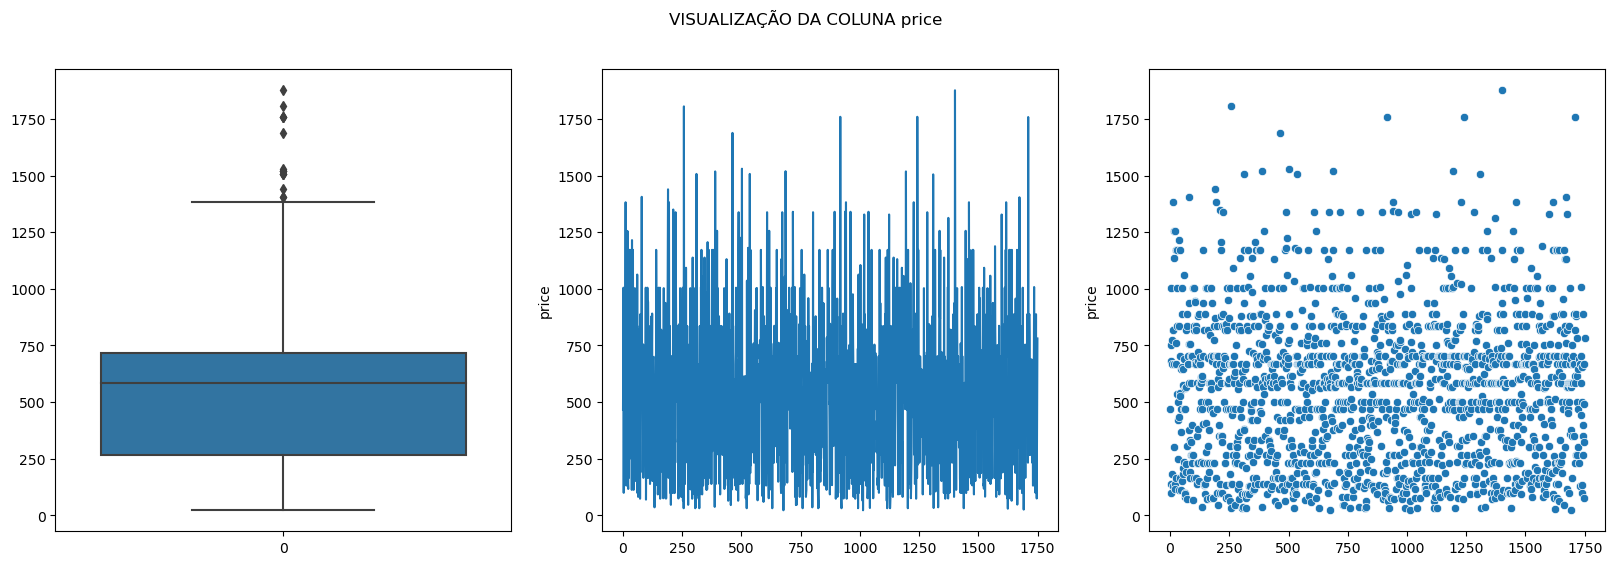

In [29]:
figura, _ = plt.subplots(figsize = (20, 6))
figura.suptitle("VISUALIZAÇÃO DA COLUNA price")
i = 1

eixos = plt.subplot(1, 3, i)
sns.boxplot(df_inicial_processed["price"], ax = eixos)
i += 1

eixos = plt.subplot(1, 3, i)
sns.lineplot(df_inicial_processed["price"], ax = eixos)
i += 1

eixos = plt.subplot(1, 3, i)
sns.scatterplot(df_inicial_processed["price"], ax = eixos)

plt.show()

In [30]:
mediana = df_inicial_processed["price"].median()
media = df_inicial_processed["price"].mean()
print("Média:",media)
print("Mediana:", mediana)
print("Valor máximo:", df_inicial_processed["price"].max())
print("Valor mínimo:", df_inicial_processed["price"].min())

Média: 548.8521
Mediana: 585.0
Valor máximo: 1876.0
Valor mínimo: 23.0


Pela obervação dos gráficos e valores acima, foi decidido substituir todos os valores faltantes pela mediana.

In [31]:
df_inicial_processed["price"] = df_inicial_processed["price"].fillna(mediana)
df_inicial_processed["price"].isna().unique()

array([False])

## DATAFRAME PROCESSADO EM COMPARACAO COM O DATAFRAME FINAL

### PROCESSADO:

In [32]:
df_inicial_processed.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,290,2022-03-28,german,0.0,468.0,0
1,A Man Without Breath,PhilipKerr,JonathanKeeble,895,2022-03-03,English,0.0,585.0,0
2,Crashing Through,RobertKurson,DougOrdunio,612,2007-04-30,English,5.0,1005.0,1
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24,2021-05-25,English,0.0,100.0,0
4,Annabel,KathleenWinter,LaurenceBouvard,704,2011-06-10,English,0.0,752.0,0


### FINAL:

In [33]:
df_final.head(5)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Die Armada der Irren,JensFischerRodrian,AllysonVoller,290.0,2022-03-28,german,0.0,468.0,0.0
1,A Man Without Breath,PhilipKerr,JonathanKeeble,895.0,2022-03-03,English,0.0,585.0,0.0
2,Crashing Through,RobertKurson,DougOrdunio,612.0,2007-04-30,English,5.0,1005.0,1.0
3,Nate the Great and the Earth Day Robot,AndrewSharmat,JohnLavelle,24.0,2021-05-25,English,0.0,100.0,0.0
4,Annabel,KathleenWinter,LaurenceBouvard,704.0,2011-10-06,English,0.0,752.0,0.0


## SALVANDO O DATAFRAME EM UM ARQUIVO CSV

In [34]:
df_inicial_processed.to_csv("./datasets/processed/dataframeTratado.csv", sep = ";")